# CS6140 Assignment 3: Regression Models Part 1
- Student: Sukhrobbek Ilyosbekov

# Exploratory Data Analysis (EDA) on EPA Vehicle Emissions Data

In this notebook, we will perform exploratory data analysis on the EPA vehicle emissions data from the years 2015 to 2024. The goal is to understand the data, identify patterns, and prepare it for regression analysis.

---

**Table of Contents**

1. [Initial Exploration and Summary Statistics](#1)
2. [Data Structure and Missing Values](#2)
3. [Comparing Column Names Across Years](#3)
4. [Distribution of Key Variables](#4)
5. [Correlation Analysis](#5)
6. [Combining Datasets](#6)
7. [Standardizing Continuous Variables](#7)
8. [Temporal Analysis](#8)
9. [Vehicle Manufacturer Analysis](#9)
10. [Creating a Clean Dataset for Regression](#10)


## Setup
In order to run this notebook, you need to have the following libraries installed:
- pandas
- numpy
- matplotlib
- seaborn
- openpyxl

You can install these libraries using the following command:
```bash
pip install pandas numpy matplotlib seaborn openpyxl
```

In [1]:
# Import necessary libraries
import os
import sys
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add the parent directory to the Python path to import the core module
sys.path.append(os.path.abspath(os.path.join("..")))

from core import get_data_path

## 1. Initial Exploration and Summary Statistics <a id="1"></a>
Load the datasets for all the years and compare the basic summary statistics. What are the key summary statistics (mean, median, standard deviation, etc.) for continuous variables such as "Test Veh Displacement (L)" and "Set Coef A (lbf)" in each dataset? Identify any outliers or anomalies.

In [15]:
# Define the file paths
csv_files = ["15-testcar.csv", "16-testcar.csv"]
xlsx_files = ["17-testcar.xlsx", "18-testcar.xlsx", "19-testcar.xlsx", 
              "20-testcar.xlsx", "21-testcar.xlsx", "22-testcar.xlsx", 
              "23-testcar.xlsx", "24-testcar.xlsx"]

# Load CSV files
dfs_csv: list[pd.DataFrame] = []
for file in csv_files:
    file_path = get_data_path(f"assignment3/{file}")
    df = pd.read_csv(file_path)
    df["Year"] = "20" + file[:2]  # Extract year from filename
    dfs_csv.append(df)

# Load Excel files
dfs_excel: list[pd.DataFrame] = []
for file in xlsx_files:
    file_path = get_data_path(f"assignment3/{file}")
    df = pd.read_excel(file_path)
    df["Year"] = "20" + file[:2]  # Extract year from filename
    dfs_excel.append(df)

# Combine all dataframes
dfs = dfs_csv + dfs_excel


print("Number of datasets loaded:", len(dfs))
print("The shape of data for each dataset:")
for i, df in enumerate(dfs):
    print(f"Dataset {2015 + i}: {df.shape}")

print("Few rows of the first dataset:")
display(dfs[0].head())

print("Columns in the dataset:")
print(dfs[0].columns)


Number of datasets loaded: 10
The shape of data for each dataset:
Dataset 2015: (4832, 68)
Dataset 2016: (4650, 68)
Dataset 2017: (4685, 68)
Dataset 2018: (4727, 68)
Dataset 2019: (4719, 68)
Dataset 2020: (4450, 68)
Dataset 2021: (4265, 68)
Dataset 2022: (4493, 68)
Dataset 2023: (4521, 68)
Dataset 2024: (4137, 68)
Few rows of the first dataset:


,Model Year,Vehicle Manufacturer Name,Veh Mfr Code,Represented Test Veh Make,Represented Test Veh Model,Test Vehicle ID,Test Veh Configuration #,Test Veh Displacement (L),Actual Tested Testgroup,Vehicle Type,...,Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Aftertreatment Device Cd,Aftertreatment Device Desc,Police - Emergency Vehicle?,Averaging Group ID,Averaging Weighting Factor,Averaging Method Cd,Averging Method Desc,Year
0,2015,aston martin,ASX,Aston Martin,DB9,143TT1042,0,5.9,DASXV05.9VH1,Car,...,0.2990,0.0192,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging,2015
1,2015,aston martin,ASX,Aston Martin,DB9,143TT1042,0,5.9,DASXV05.9VH1,Car,...,0.2990,0.0192,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging,2015
2,2015,aston martin,ASX,Aston Martin,Rapide S,410TT4202,0,6.0,FASXV06.0VHB,Car,...,2.1980,0.0280,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging,2015
3,2015,aston martin,ASX,Aston Martin,Rapide S,410TT4202,0,6.0,FASXV06.0VHB,Car,...,2.1980,0.0280,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging,2015
4,2015,aston martin,ASX,Aston Martin,V12 Vantage S,288TT2087,0,6.0,FASXV06.0VHB,Car,...,0.4063,0.0186,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging,2015


Columns in the dataset:
Index(['Model Year', 'Vehicle Manufacturer Name', 'Veh Mfr Code',
       'Represented Test Veh Make', 'Represented Test Veh Model',
       'Test Vehicle ID', 'Test Veh Configuration #',
       'Test Veh Displacement (L)', 'Actual Tested Testgroup', 'Vehicle Type',
       'Rated Horsepower', '# of Cylinders and Rotors', 'Engine Code',
       'Tested Transmission Type Code', 'Tested Transmission Type',
       '# of Gears', 'Transmission Lockup?', 'Drive System Code',
       'Drive System Description', 'Transmission Overdrive Code',
       'Transmission Overdrive Desc', 'Equivalent Test Weight (lbs.)',
       'Axle Ratio', 'N/V Ratio', 'Shift Indicator Light Use Cd',
       'Shift Indicator Light Use Desc', 'Test Number', 'Test Originator',
       'Analytically Derived FE?', 'ADFE Test Number',
       'ADFE Total Road Load HP', 'ADFE Equiv. Test Weight (lbs.)',
       'ADFE N/V Ratio', 'Test Procedure Cd', 'Test Procedure Description',
       'Test Fuel Type Cd', '

In [6]:
# Calculate summary statistics for "Test Veh Displacement (L)" and "Set Coef A (lbf)" in each dataset
for df in dfs:
    year = df["Year"].iloc[0]
    print(f"Summary Statistics for Year {year}:")
    print(df[["Test Veh Displacement (L)", "Set Coef A (lbf)"]].describe())
    print("\n")

Summary Statistics for Year 2015:
       Test Veh Displacement (L)  Set Coef A (lbf)
count                4832.000000       4832.000000
mean                    3.334225         12.015613
std                     4.992816         10.256352
min                     0.001000        -28.100000
25%                     2.000000          6.119000
50%                     3.000000         12.117000
75%                     3.700000         19.010250
max                    99.999000        150.200000


Summary Statistics for Year 2016:
       Test Veh Displacement (L)  Set Coef A (lbf)
count                4650.000000       4650.000000
mean                    3.234766         12.148468
std                     5.084566          9.498626
min                     0.001000        -30.012000
25%                     2.000000          6.342500
50%                     2.967000         12.364000
75%                     3.600000         18.840000
max                    99.999000         60.600000


Summary St

**Observations:**

- **Mean**: The average values for displacement and coefficient A.
- **Standard Deviation**: Shows the variability in the data.
- **Min and Max**: Helps identify any outliers or extreme values.
- **Quartiles**: Provide insights into the distribution of the data.

## 2. Data Structure and Missing Values <a id="2"></a>

In [7]:
# Check for missing values in each dataset
for df in dfs:
    year = df["Year"].iloc[0]
    print(f"Missing Values for Year {year}:")
    missing = df.isnull().sum()
    print(missing[missing > 0])
    print("\n")

Missing Values for Year 2015:
# of Cylinders and Rotors          166
ADFE Test Number                  4447
ADFE Total Road Load HP           4447
ADFE Equiv. Test Weight (lbs.)    4445
ADFE N/V Ratio                    4447
THC (g/mi)                         313
CO (g/mi)                          302
CO2 (g/mi)                          90
NOx (g/mi)                         339
PM (g/mi)                         4163
CH4 (g/mi)                         742
N2O (g/mi)                        2775
RND_ADJ_FE                           2
FE Bag 1                          2702
FE Bag 2                          2702
FE Bag 3                          2940
FE Bag 4                          4742
DT-Inertia Work Ratio Rating      3230
DT-Absolute Speed Change Ratg     3230
DT-Energy Economy Rating          3230
Aftertreatment Device Cd           181
Aftertreatment Device Desc         181
Averaging Group ID                4512
Averaging Weighting Factor        4512
dtype: int64


Missing Values for 

## 3. Comparing Column Names Across Years <a id="3"></a>

In [8]:
# Collect column names for each dataframe
column_names = {}
for df in dfs:
    year = df["Year"].iloc[0]
    column_names[year] = df.columns.tolist()

# Display column names for each year
for year, columns in column_names.items():
    print(f"Columns for Year {year}:")
    print(columns)
    print("\n")


Columns for Year 2015:
['Model Year', 'Vehicle Manufacturer Name', 'Veh Mfr Code', 'Represented Test Veh Make', 'Represented Test Veh Model', 'Test Vehicle ID', 'Test Veh Configuration #', 'Test Veh Displacement (L)', 'Actual Tested Testgroup', 'Vehicle Type', 'Rated Horsepower', '# of Cylinders and Rotors', 'Engine Code', 'Tested Transmission Type Code', 'Tested Transmission Type', '# of Gears', 'Transmission Lockup?', 'Drive System Code', 'Drive System Description', 'Transmission Overdrive Code', 'Transmission Overdrive Desc', 'Equivalent Test Weight (lbs.)', 'Axle Ratio', 'N/V Ratio', 'Shift Indicator Light Use Cd', 'Shift Indicator Light Use Desc', 'Test Number', 'Test Originator', 'Analytically Derived FE?', 'ADFE Test Number', 'ADFE Total Road Load HP', 'ADFE Equiv. Test Weight (lbs.)', 'ADFE N/V Ratio', 'Test Procedure Cd', 'Test Procedure Description', 'Test Fuel Type Cd', 'Test Fuel Type Description', 'Test Category', 'THC (g/mi)', 'CO (g/mi)', 'CO2 (g/mi)', 'NOx (g/mi)', 'PM 

All column names are consistent across the years and there are no missing columns. This consistency will help us combine the datasets easily.

## 4. Distribution of Key Variables <a id="4"></a>

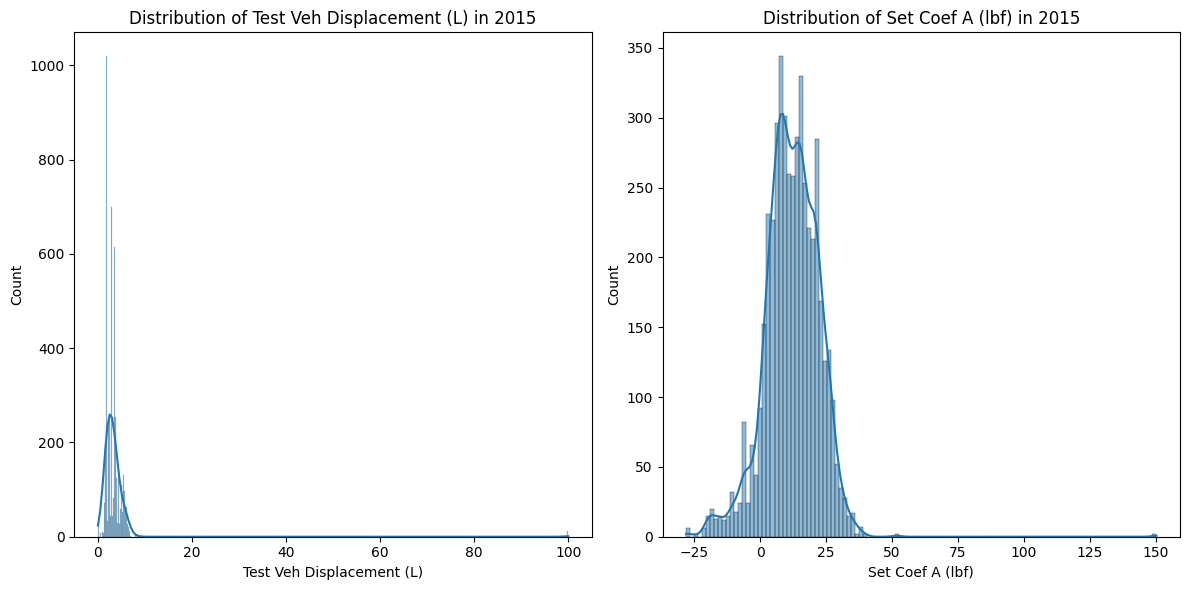

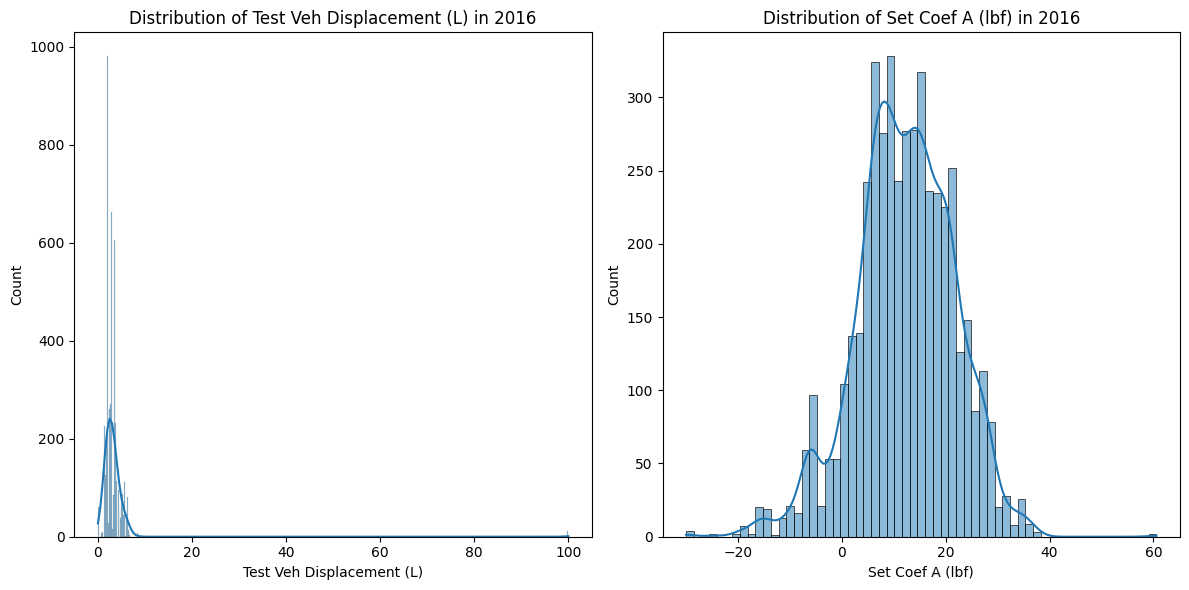

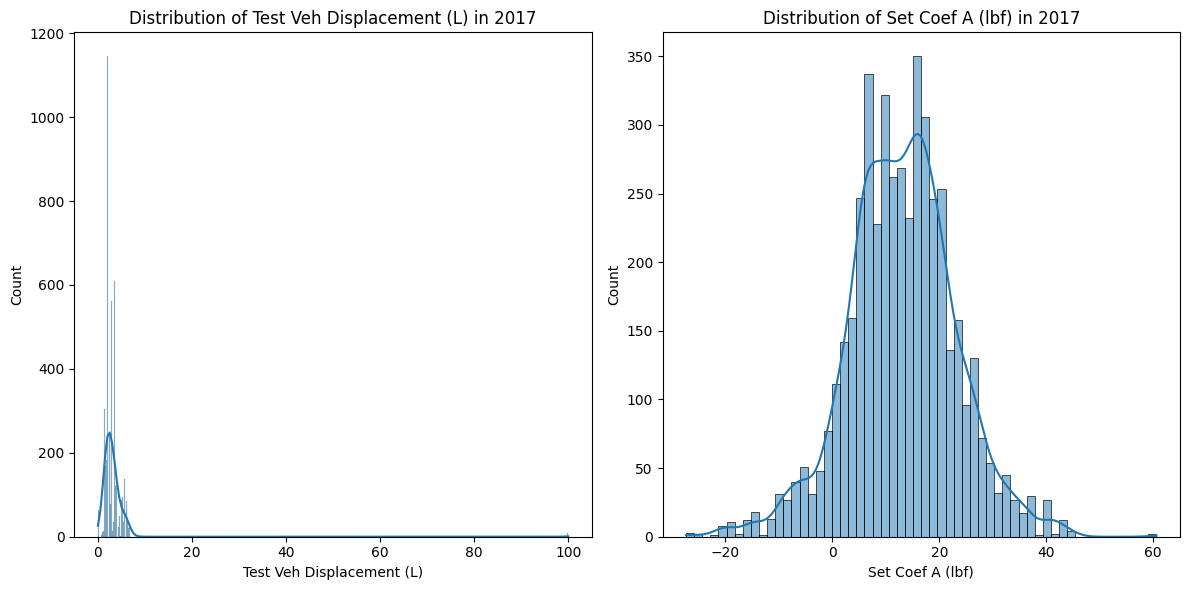

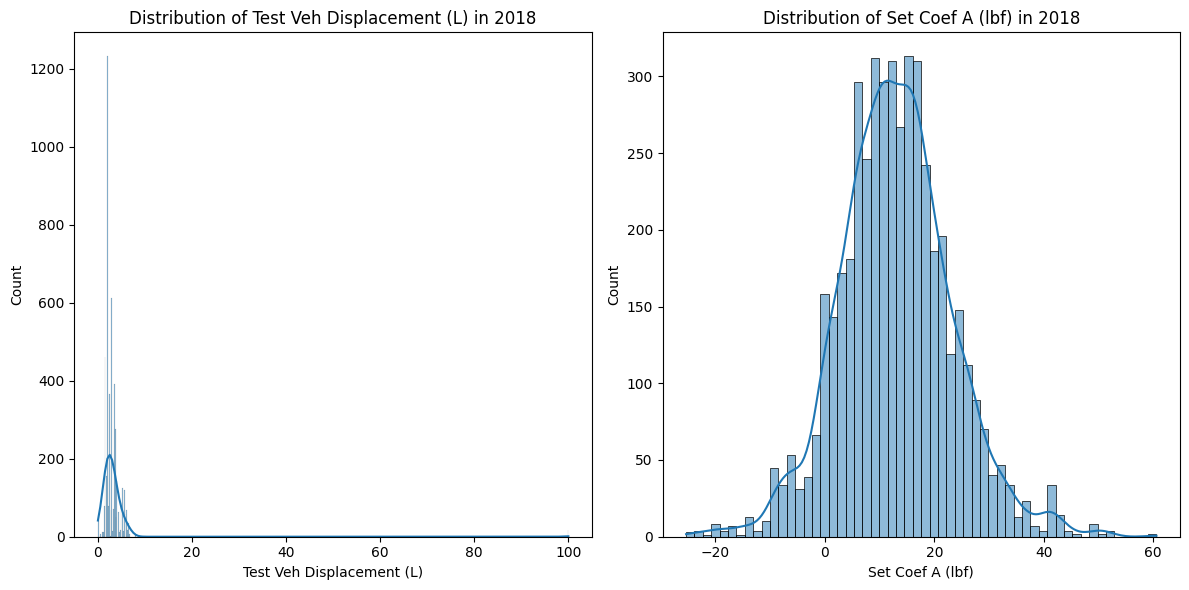

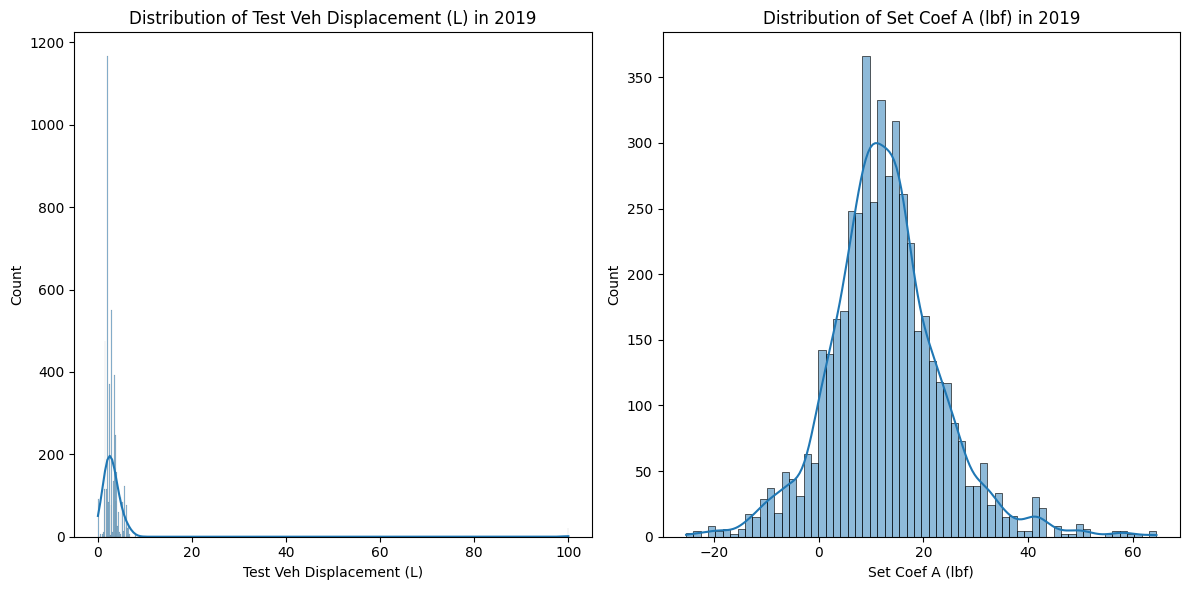

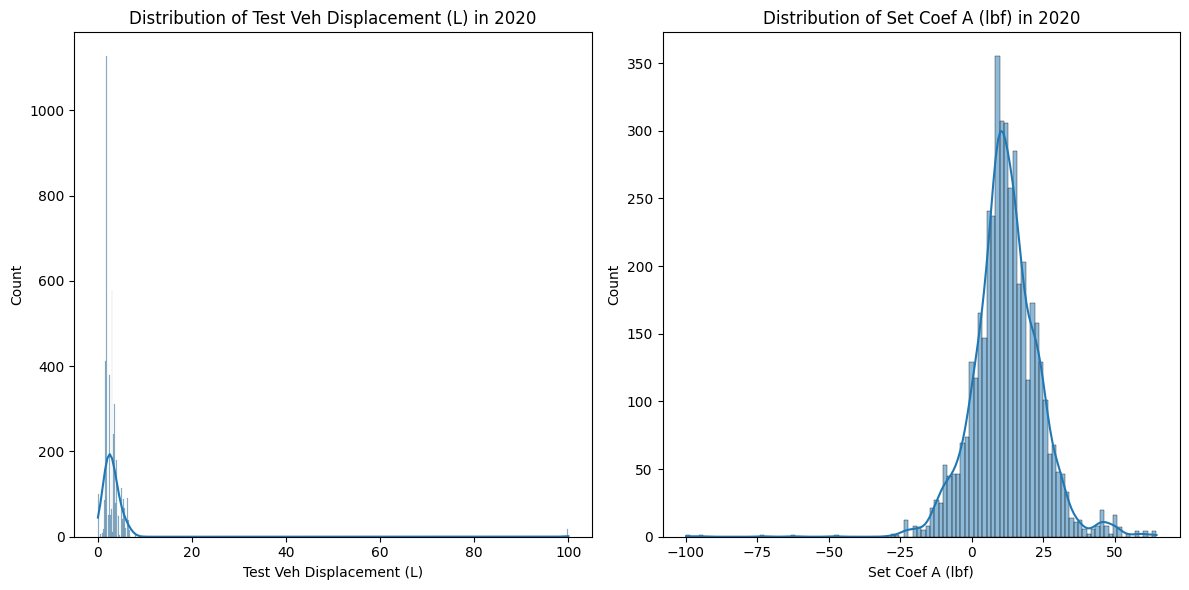

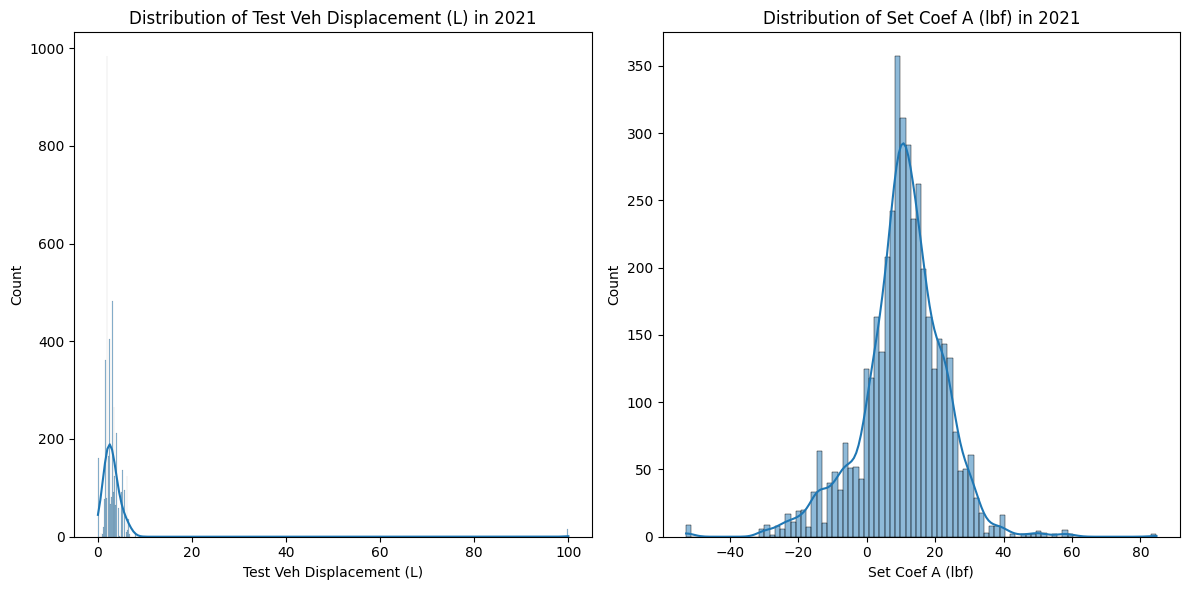

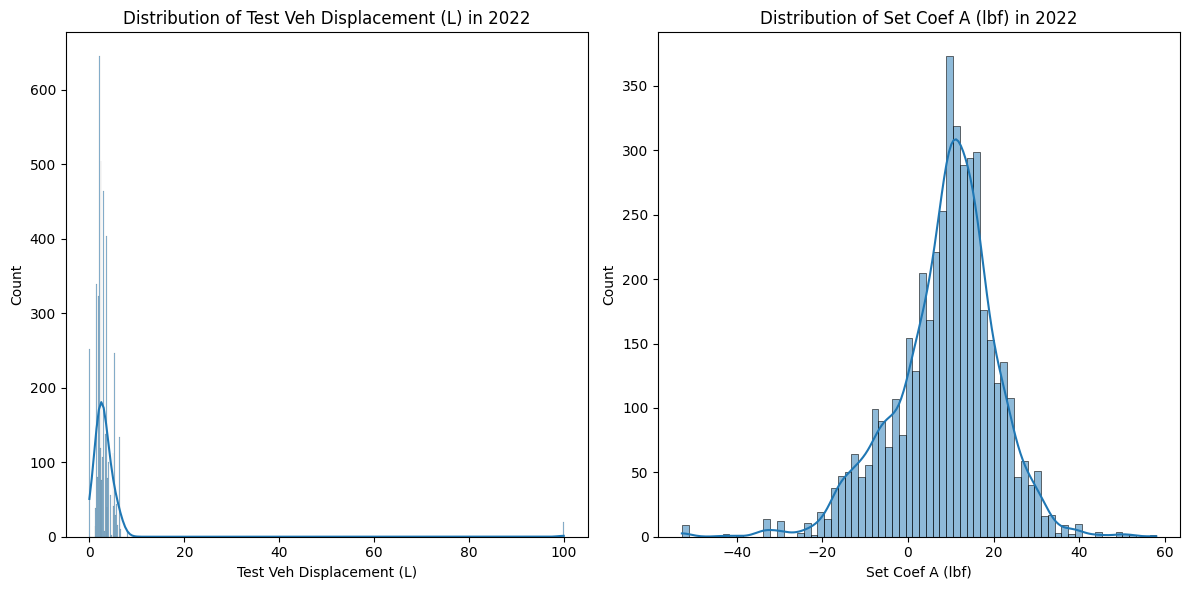

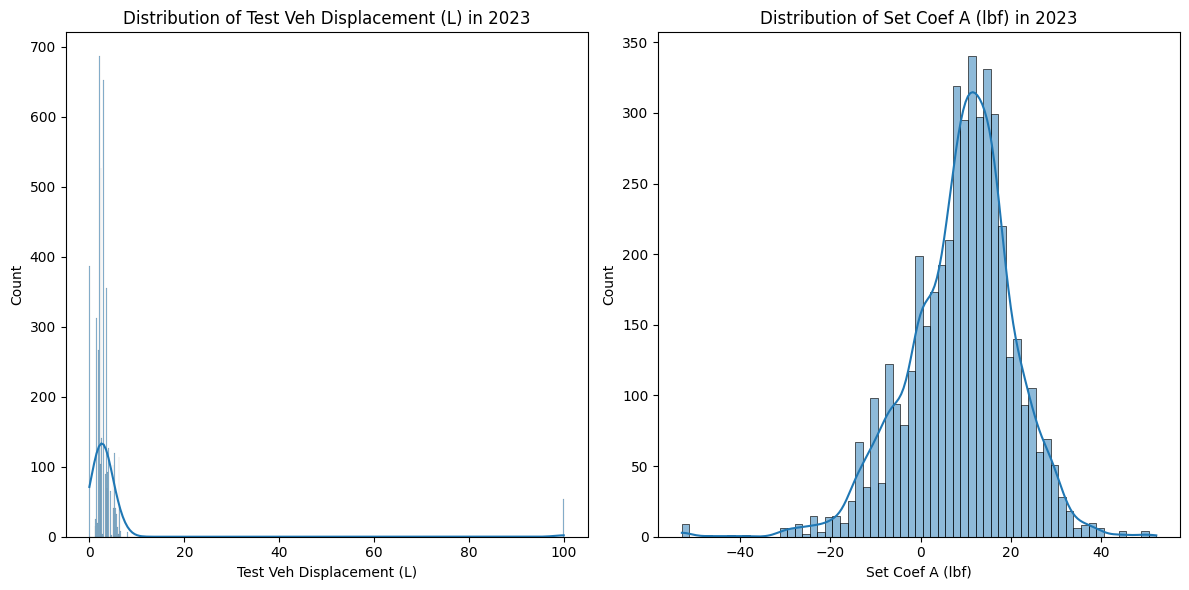

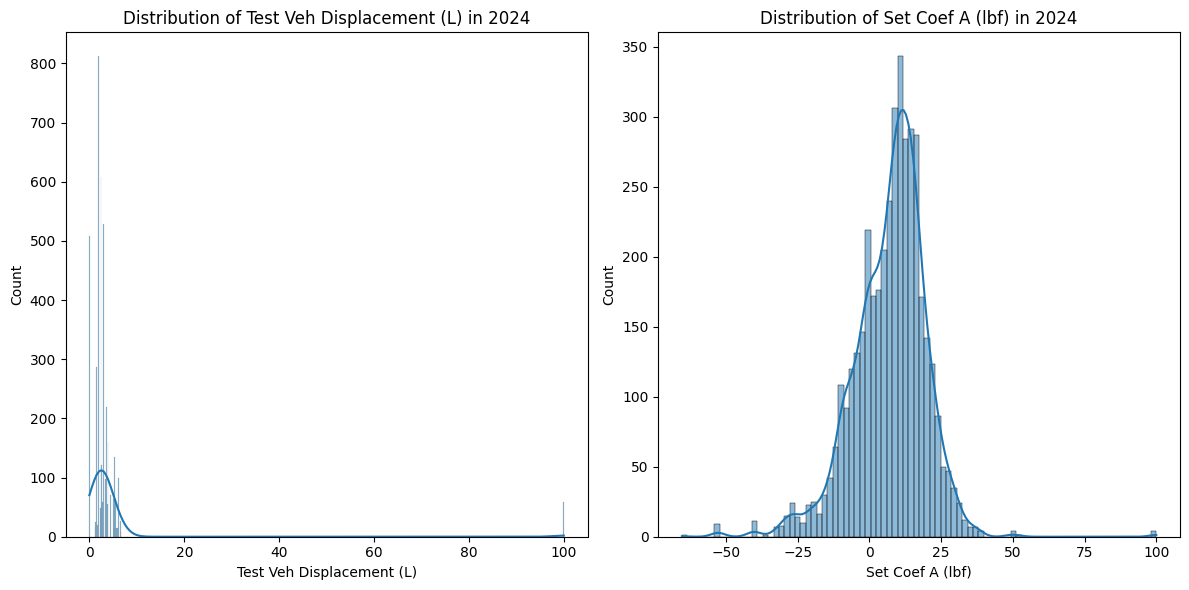

In [18]:
from matplotlib.axes import Axes

# Plot the distribution of "Test Veh Displacement (L)" and "Set Coef A (lbf)" for each year
for df in dfs:
    year = df["Year"].iloc[0]
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax: tuple[Axes, Axes]

    sns.histplot(df["Test Veh Displacement (L)"], ax=ax[0], kde=True) # type: ignore
    ax[0].set_title(f"Distribution of Test Veh Displacement (L) in {year}")

    sns.histplot(df["Set Coef A (lbf)"], ax=ax[1], kde=True) # type: ignore
    ax[1].set_title(f"Distribution of Set Coef A (lbf) in {year}")
    
    plt.tight_layout()
    plt.show()


## 5. Correlation Analysis <a id="5"></a>

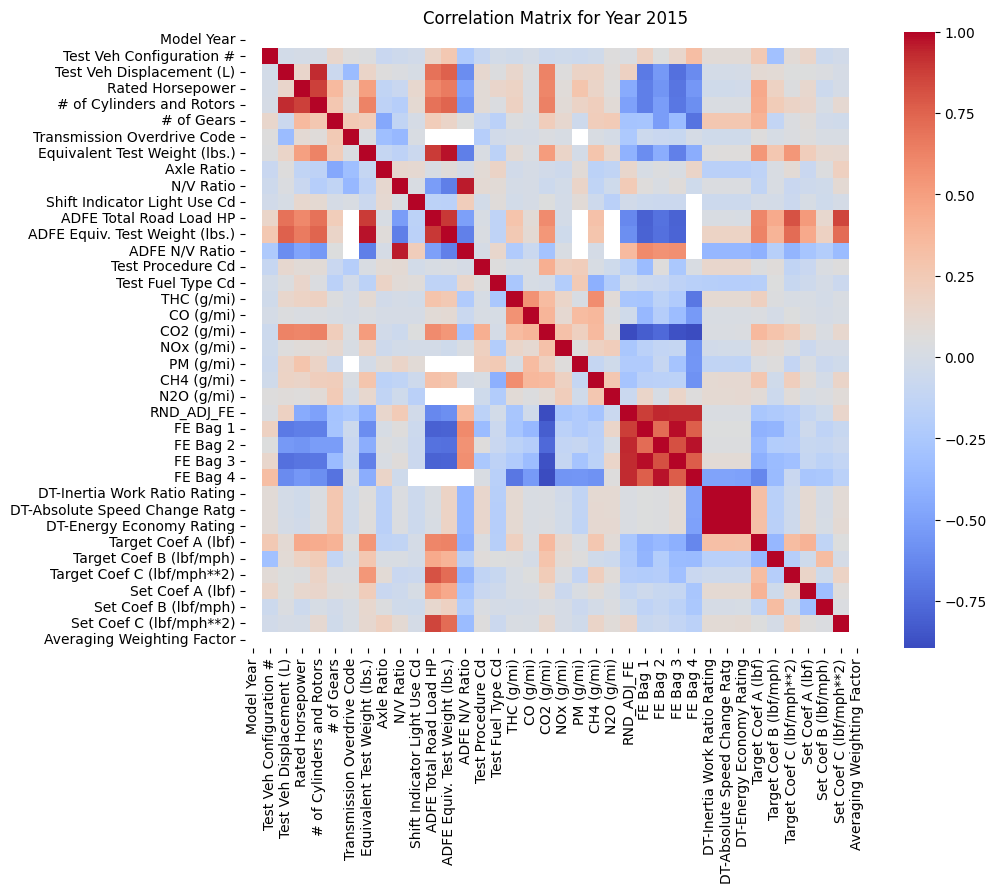

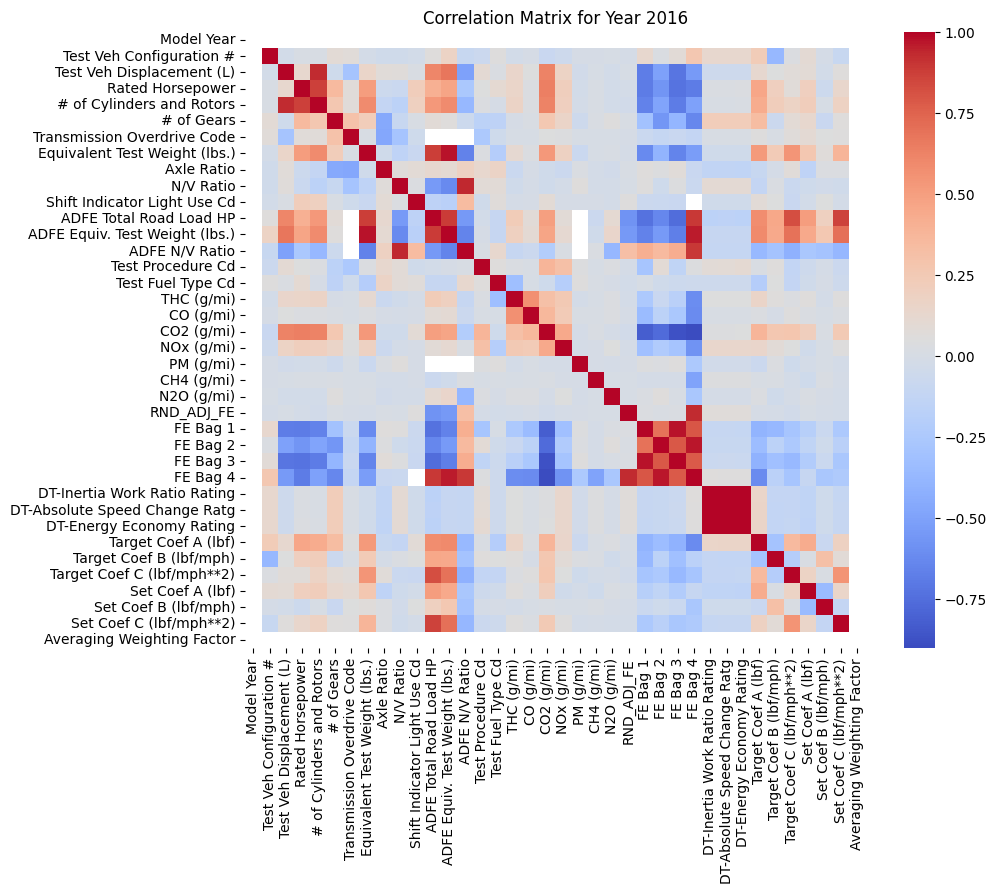

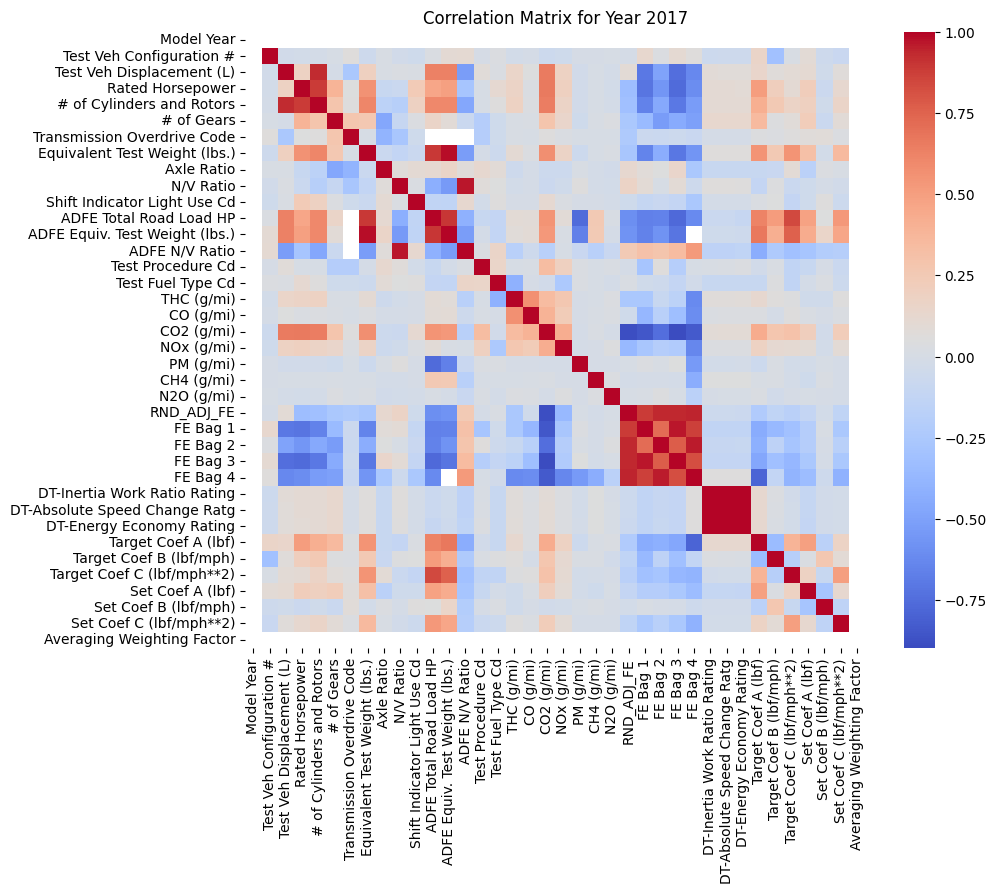

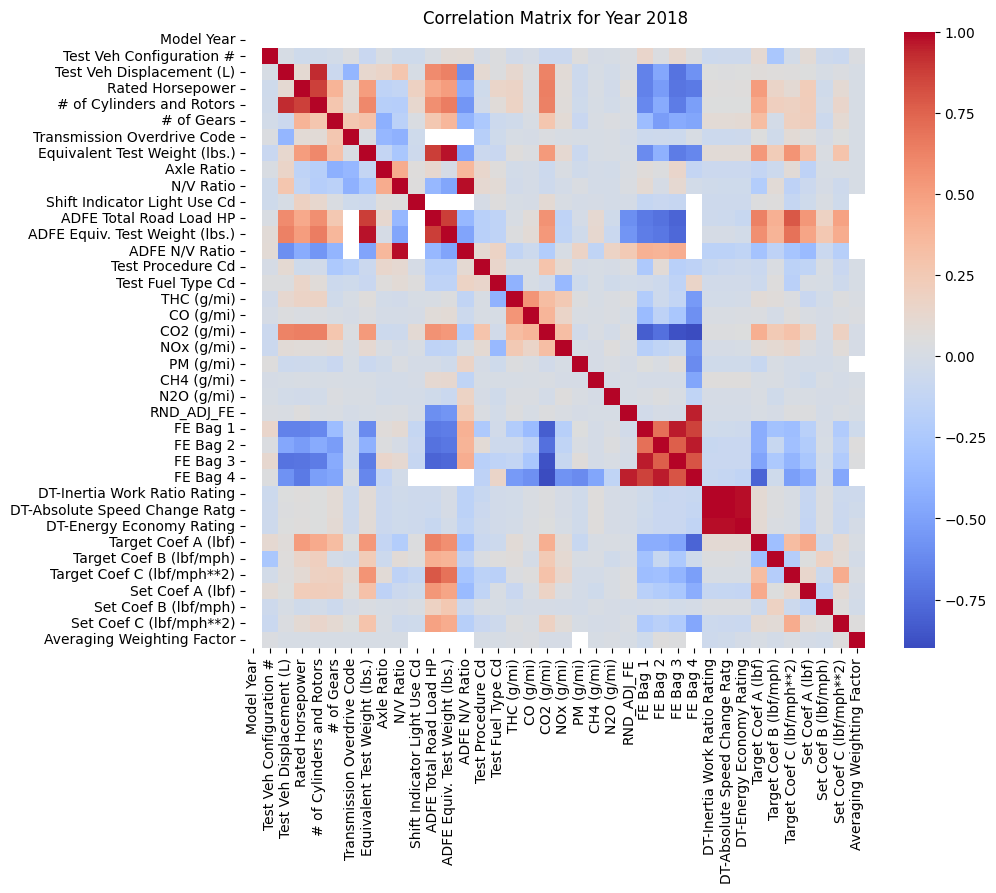

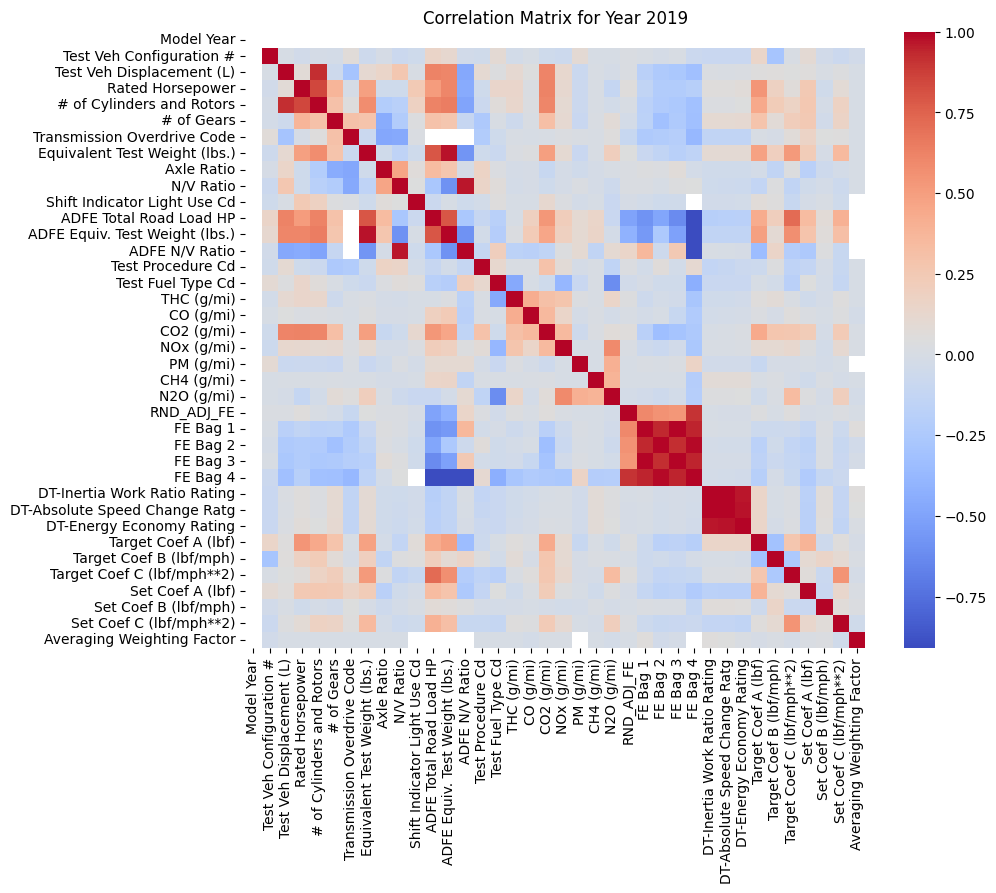

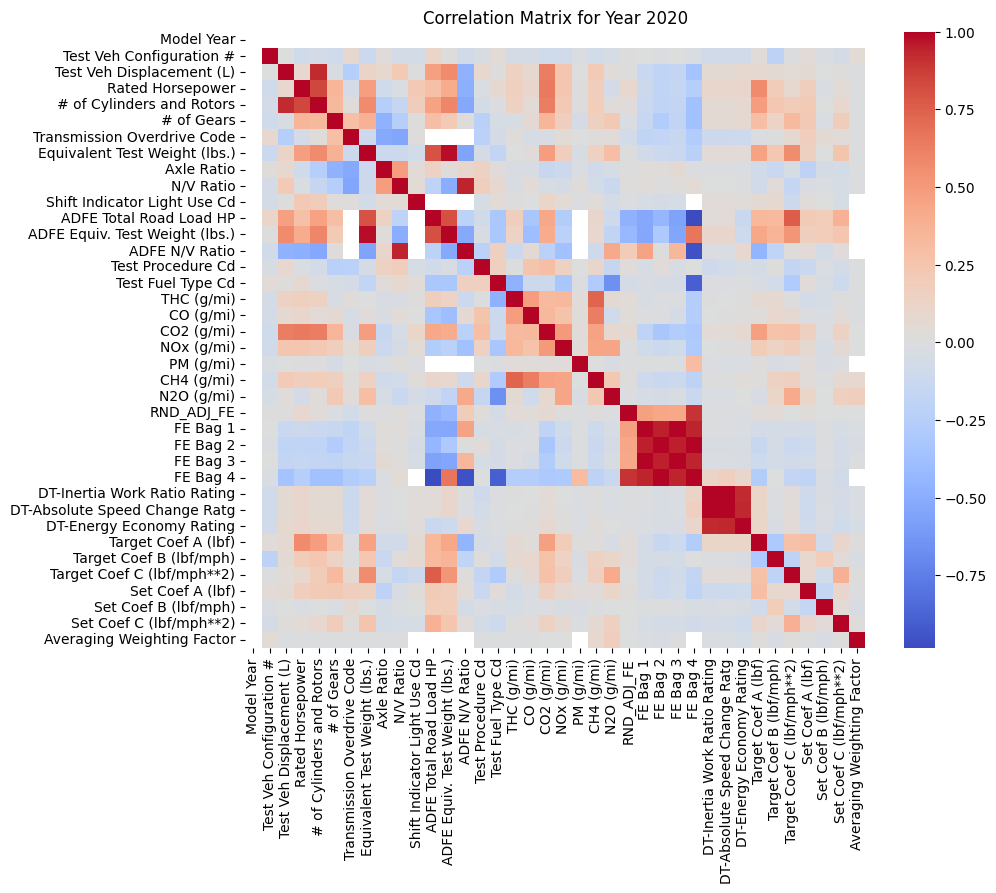

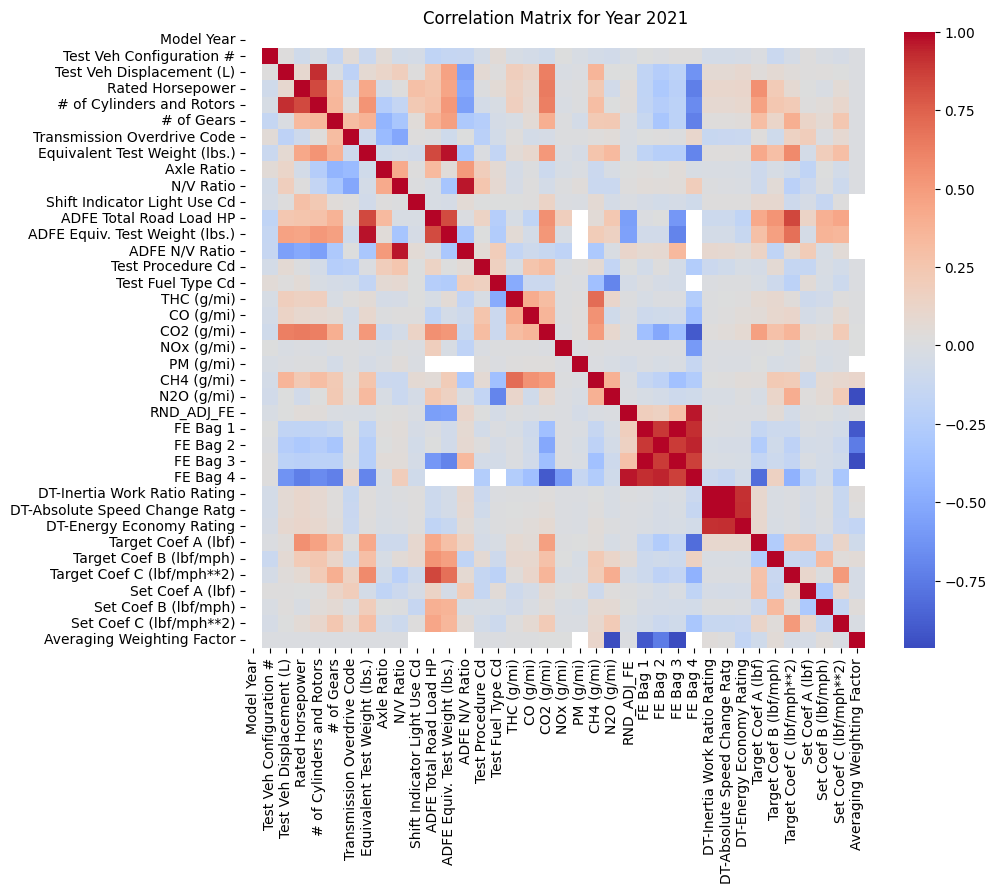

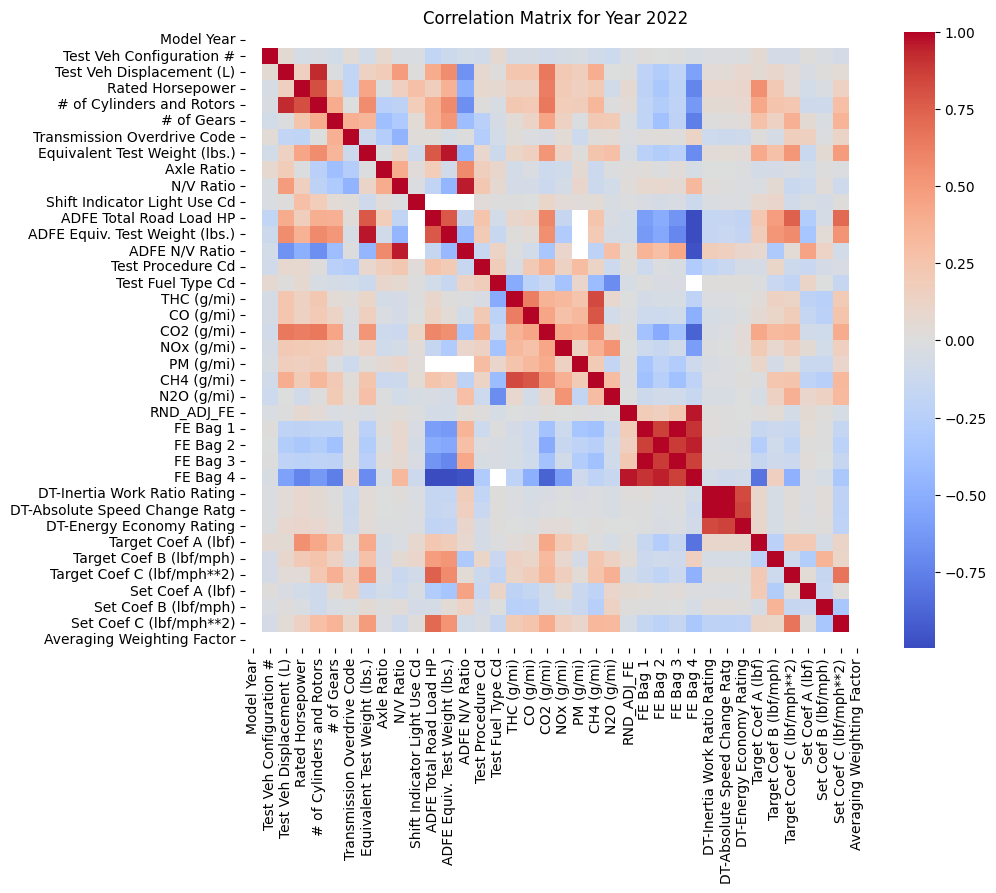

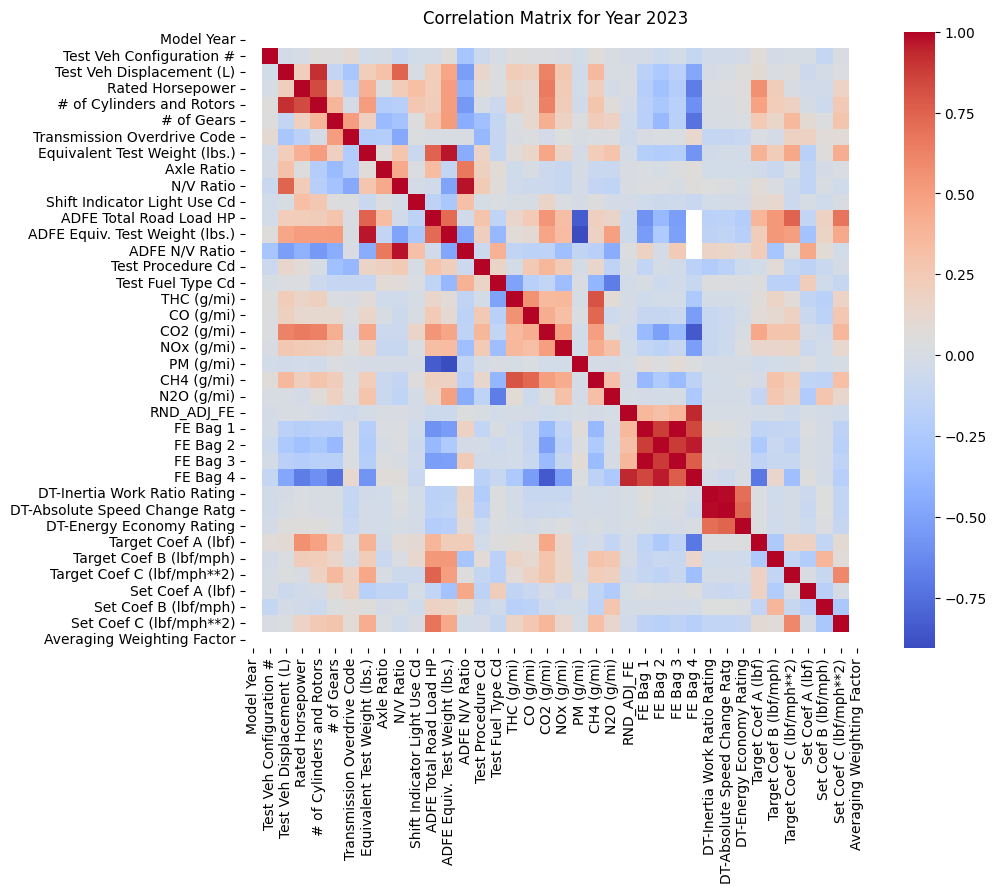

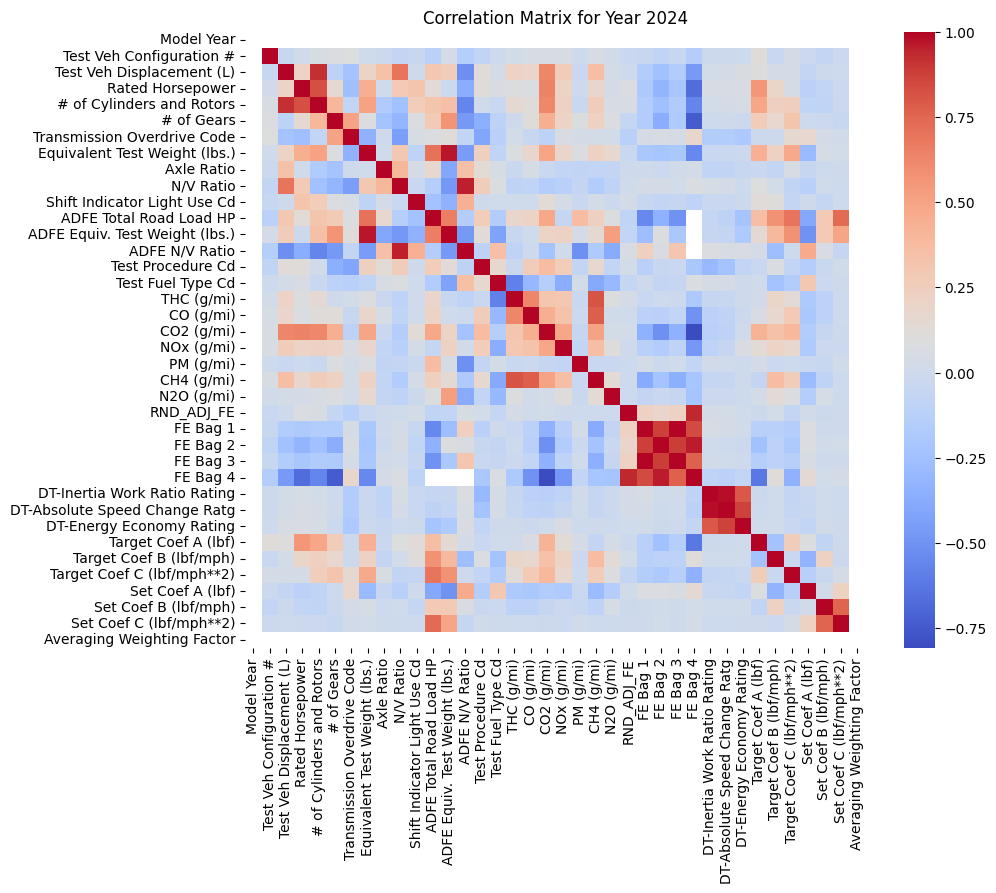

In [22]:
# Select numeric columns


# Plot correlation matrix for each year
for df in dfs:
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    year = df["Year"].iloc[0]
    corr = df[numeric_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=False, cmap="coolwarm")
    plt.title(f"Correlation Matrix for Year {year}")
    plt.show()


## 6. Combining Datasets <a id="6"></a>

In [24]:
# Combine all dataframes into a single dataframe
combined_df = pd.concat(dfs, ignore_index=True)

# Convert "Year" to numeric
combined_df["Year"] = combined_df["Year"].astype(int)

# Check data types
print("Data Types:")
print(combined_df.dtypes)

# Check for missing values
print("\nMissing Values After Combining:")
missing_values = combined_df.isnull().sum()
print(missing_values[missing_values > 0])

Data Types:
Model Year                      int64
Vehicle Manufacturer Name      object
Veh Mfr Code                   object
Represented Test Veh Make      object
Represented Test Veh Model     object
                               ...   
Averaging Group ID             object
Averaging Weighting Factor    float64
Averaging Method Cd            object
Averging Method Desc           object
Year                            int64
Length: 68, dtype: object

Missing Values After Combining:
# of Cylinders and Rotors          2376
Engine Code                          24
ADFE Test Number                  40746
ADFE Total Road Load HP           40746
ADFE Equiv. Test Weight (lbs.)    40742
ADFE N/V Ratio                    40746
THC (g/mi)                         6008
CO (g/mi)                          5902
CO2 (g/mi)                         2913
NOx (g/mi)                         6266
PM (g/mi)                         38232
CH4 (g/mi)                         8816
N2O (g/mi)                     

## 7. Standardizing Continuous Variables <a id="7"></a>

In [25]:
from sklearn.preprocessing import StandardScaler

# List of continuous variables to standardize
continuous_vars = ["Test Veh Displacement (L)", "Set Coef A (lbf)", 
                   "Set Coef B (lbf/mph)", "Set Coef C (lbf/mph**2)", "CO2 (g/mi)"]

# Drop rows with missing values in these columns
combined_df.dropna(subset=continuous_vars, inplace=True)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
combined_df[continuous_vars] = scaler.fit_transform(combined_df[continuous_vars])

# Preview the standardized data
display(combined_df[continuous_vars].head())


,Test Veh Displacement (L),Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),CO2 (g/mi)
0,2.273638,-0.292505,0.615827,-0.049567,2.133679
1,2.273638,-0.292505,0.615827,-0.049567,0.314229
2,2.351938,-0.946694,6.926865,0.040720,1.795689
3,2.351938,-0.946694,6.926865,0.040720,-0.102308
4,2.351938,0.525118,0.972422,-0.055723,2.602845


## 8. Temporal Analysis <a id="8"></a>

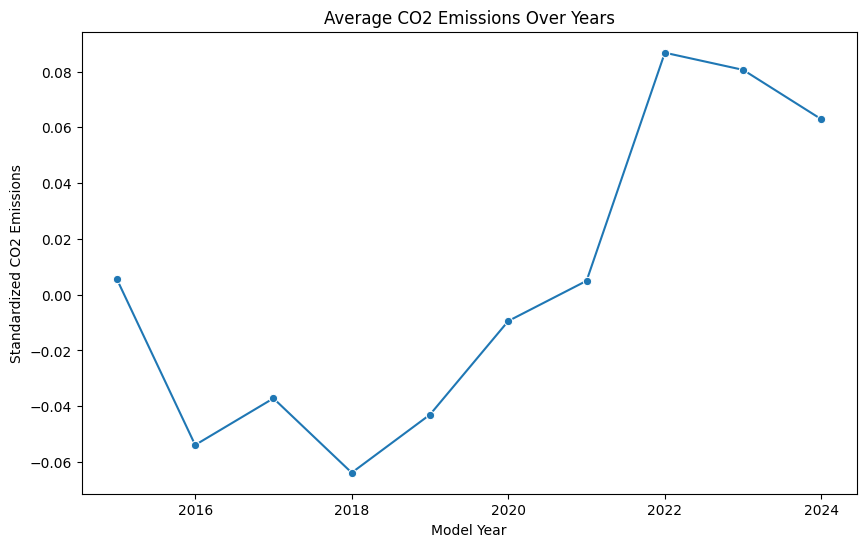

In [26]:
# Plot average CO2 emissions over the years
avg_co2 = combined_df.groupby("Year")["CO2 (g/mi)"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="CO2 (g/mi)", data=avg_co2, marker="o")
plt.title("Average CO2 Emissions Over Years")
plt.xlabel("Model Year")
plt.ylabel("Standardized CO2 Emissions")
plt.show()

## 9. Vehicle Manufacturer Analysis <a id="9"></a>

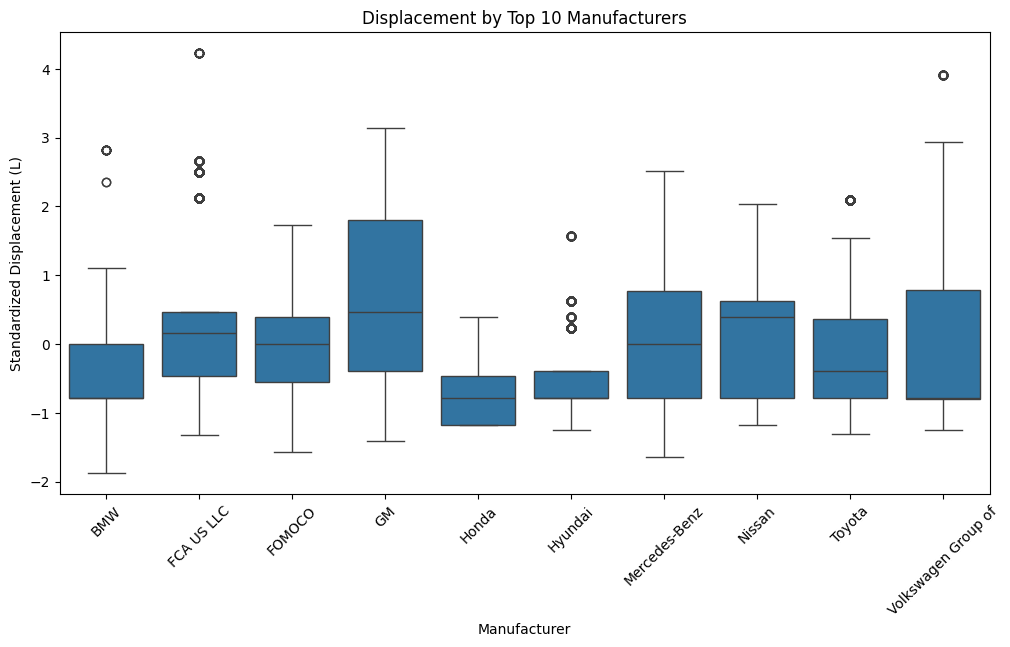

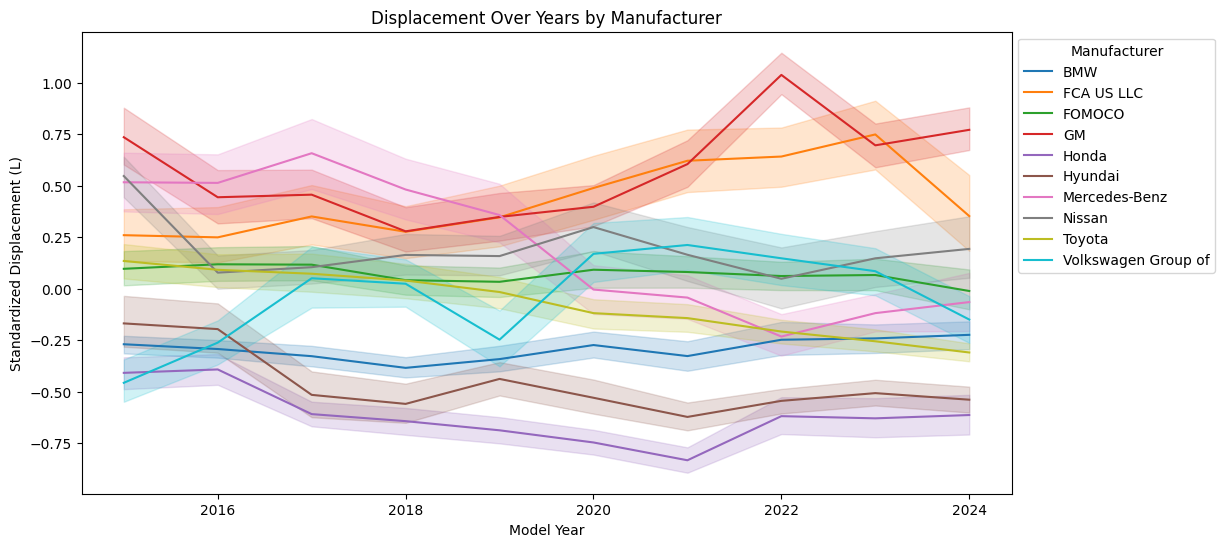

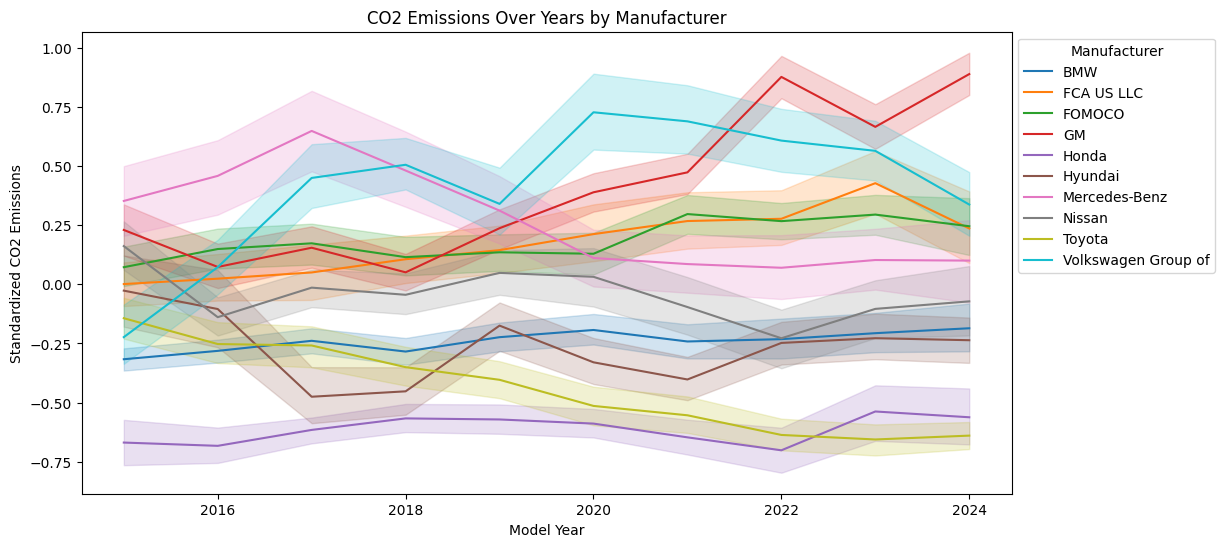

In [29]:
# Identify the top 10 manufacturers
top_manufacturers = combined_df["Vehicle Manufacturer Name"].value_counts().head(10).index.tolist()

# Filter data for top manufacturers
top_mfr_df = combined_df[combined_df["Vehicle Manufacturer Name"].isin(top_manufacturers)]

# Plot boxplot displacement across manufacturers
plt.figure(figsize=(12, 6))
sns.boxplot(x="Vehicle Manufacturer Name", y="Test Veh Displacement (L)", data=top_mfr_df)
plt.title("Displacement by Top 10 Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Standardized Displacement (L)")
plt.xticks(rotation=45)
plt.show()

# Plot line graph for displacement across manufacturers
plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Test Veh Displacement (L)", hue="Vehicle Manufacturer Name", data=top_mfr_df)
plt.title("Displacement Over Years by Manufacturer")
plt.xlabel("Model Year")
plt.ylabel("Standardized Displacement (L)")
plt.legend(title="Manufacturer", bbox_to_anchor=(1, 1))
plt.show()

# Plot linear graphs for CO2 emissions over years by manufacturer
plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="CO2 (g/mi)", hue="Vehicle Manufacturer Name", data=top_mfr_df)
plt.title("CO2 Emissions Over Years by Manufacturer")
plt.xlabel("Model Year")
plt.ylabel("Standardized CO2 Emissions")
plt.legend(title="Manufacturer", bbox_to_anchor=(1, 1))
plt.show()

## 10. Creating a Clean Dataset for Regression <a id="10"></a>

In [30]:
from scipy import stats

# 1. Remove outliers
# Calculate z-scores for continuous variables
z_scores = np.abs(stats.zscore(combined_df[continuous_vars]))
threshold = 3
combined_df = combined_df[(z_scores < threshold).all(axis=1)]

# 2. Encode categorical variables
categorical_cols = [
    "Vehicle Type", "Drive System Code", "Tested Transmission Type Code",
    "Tested Transmission Type", "Transmission Lockup?", "Test Category",
    "Police - Emergency Vehicle?",
]

combined_df = pd.get_dummies(combined_df, columns=categorical_cols, drop_first=True)

# 3. Drop unnecessary columns
columns_to_drop = [
    "Test Vehicle ID", "Test Number", "ADFE Test Number",
    "Year", "Actual Tested Testgroup", "Drive System Description",
    "Transmission Overdrive Desc", "Shift Indicator Light Use Desc",
    "Test Originator", "Analytically Derived FE?",
    "Test Procedure Description", "Test Fuel Type Description",
    "Aftertreatment Device Desc", "Averaging Group ID",
    "Averging Method Desc", "Averaging Method Cd",
    "Veh Mfr Code", "Test Veh Configuration #"

]
combined_df.drop(columns=columns_to_drop, inplace=True)

# 4. Final clean dataset
clean_df = combined_df.copy()

# Save the clean dataset for regression
clean_df.to_csv("clean_vehicles_data.csv", index=False)

# Display the final cleaned dataset
print("Final Cleaned Dataset Shape:", clean_df.shape)
print("Final Cleaned Dataset:")
display(clean_df.head())


Final Cleaned Dataset:


,Model Year,Vehicle Manufacturer Name,Represented Test Veh Make,Represented Test Veh Model,Test Veh Displacement (L),Rated Horsepower,# of Cylinders and Rotors,Engine Code,# of Gears,Transmission Overdrive Code,...,Tested Transmission Type_Continuously Variable,Tested Transmission Type_Manual,Tested Transmission Type_Other,Tested Transmission Type_Selectable Continuously Variable (e.g. CVT with paddles),Tested Transmission Type_Semi-Automatic,Transmission Lockup?_Y,Test Category_HWY,Test Category_SC03,Test Category_US06,Police - Emergency Vehicle?_Y
0,2015,aston martin,Aston Martin,DB9,2.273638,510,12.0,AM11/,6,2,...,False,False,False,False,True,True,False,False,False,False
1,2015,aston martin,Aston Martin,DB9,2.273638,510,12.0,AM11/,6,2,...,False,False,False,False,True,True,True,False,False,False
4,2015,aston martin,Aston Martin,V12 Vantage S,2.351938,565,12.0,AM28/,7,2,...,False,False,False,False,True,True,False,False,False,False
5,2015,aston martin,Aston Martin,V12 Vantage S,2.351938,565,12.0,AM28/,7,2,...,False,False,False,False,True,True,True,False,False,False
6,2015,aston martin,Aston Martin,V8 VANTAGE,1.334034,420,8.0,AM14/,6,2,...,False,True,False,False,False,False,False,False,False,False
